In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/zomato_cleaned.csv')
df

,url,online_order,book_table,rate,votes,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),Afghan,...,Spanish,Steak,Street Food,Sushi,Tamil,Tea,Thai,Tibetan,Turkish,Vietnamese
0,https://www.zomato.com/bangalore/jalsa-banasha...,1,1,4.1,775,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,1,0,4.1,787,Casual Dining,800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,1,0,3.8,918,"Cafe, Casual Dining",800,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,0,0,3.7,88,Quick Bites,300,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,0,0,3.8,166,Casual Dining,600,Buffet,Banashankari,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,https://www.zomato.com/bangalore/chung-wah-itp...,0,0,2.5,73,Casual Dining,800,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
9033,https://www.zomato.com/bangalore/nawabs-empire...,0,0,3.2,5,Quick Bites,300,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0
9034,https://www.zomato.com/bangalore/fujian-expres...,1,0,3.8,182,Food Court,600,Dine-out,Whitefield,0,...,0,0,0,0,0,0,1,0,0,0
9035,https://www.zomato.com/bangalore/seeya-restaur...,0,0,3.3,4,Quick Bites,350,Dine-out,Whitefield,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x = df.drop(['rate', 'url'], axis=1)
y = df['rate']

In [4]:
y = y.apply(lambda x: 1 if x >= 3.75 else 0)

In [5]:
cat = x.select_dtypes(include='object').columns
numeric = x.select_dtypes(exclude='object').columns

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
cat_data = ohe.fit_transform(x[cat]).toarray() 

In [7]:
x = pd.concat([x[numeric], pd.DataFrame(cat_data, columns=ohe.get_feature_names(cat))], axis=1)

c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 42)

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train , y_train = smote.fit_resample(x_train,y_train)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, classification_report, plot_confusion_matrix

### DecisionTree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4275
           1       1.00      1.00      1.00      4275

    accuracy                           1.00      8550
   macro avg       1.00      1.00      1.00      8550
weighted avg       1.00      1.00      1.00      8550

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1060
           1       0.72      0.71      0.71       748

    accuracy                           0.76      1808
   macro avg       0.76      0.76      0.76      1808
weighted avg       0.76      0.76      0.76      1808



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
1922,0,0
1318,1,1
4787,0,0
2115,0,0
5689,0,0
...,...,...
6068,1,0
3245,1,1
5327,1,1
1111,0,1


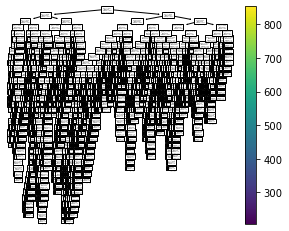

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train_scaled,y_train)
y_pred_dtc = dtc.predict(x_test_scaled)
print(classification_report(y_train, dtc.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_dtc))
plot_confusion_matrix(dtc, x_test_scaled, y_test)
plot_tree(dtc)
dt_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dtc})
dt_dataframe

### RandomForest

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4275
           1       0.90      0.89      0.90      4275

    accuracy                           0.90      8550
   macro avg       0.90      0.90      0.90      8550
weighted avg       0.90      0.90      0.90      8550

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1060
           1       0.76      0.76      0.76       748

    accuracy                           0.80      1808
   macro avg       0.80      0.80      0.80      1808
weighted avg       0.80      0.80      0.80      1808



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
1922,0,0
1318,1,1
4787,0,0
2115,0,0
5689,0,0
...,...,...
6068,1,1
3245,1,1
5327,1,1
1111,0,0


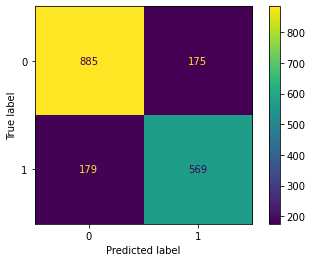

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=15)
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print(classification_report(y_train, rf.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(rf, x_test_scaled, y_test)
rf_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
rf_dataframe

### xgboost

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4275
           1       0.94      0.91      0.92      4275

    accuracy                           0.93      8550
   macro avg       0.93      0.93      0.93      8550
weighted avg       0.93      0.93      0.93      8550

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1060
           1       0.77      0.74      0.76       748

    accuracy                           0.80      1808
   macro avg       0.80      0.79      0.80      1808
weighted avg       0.80      0.80      0.80      1808



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
1922,0,0
1318,1,1
4787,0,0
2115,0,0
5689,0,0
...,...,...
6068,1,1
3245,1,1
5327,1,1
1111,0,0


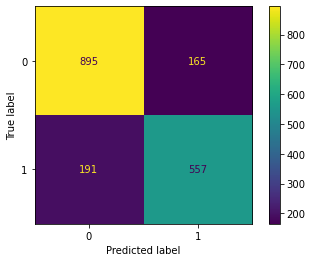

In [14]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_scaled,y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
print(classification_report(y_train, xgb.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(xgb, x_test_scaled, y_test)
xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
xgb_dataframe

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(xgb,param_grid=param_grid,cv=3)
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [16]:
final_xgb_model = grid_search.best_estimator_
final_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      4275
           1       0.94      0.91      0.92      4275

    accuracy                           0.93      8550
   macro avg       0.93      0.93      0.93      8550
weighted avg       0.93      0.93      0.93      8550

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1060
           1       0.77      0.74      0.76       748

    accuracy                           0.80      1808
   macro avg       0.80      0.79      0.80      1808
weighted avg       0.80      0.80      0.80      1808



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
1922,0,0
1318,1,1
4787,0,0
2115,0,0
5689,0,0
...,...,...
6068,1,1
3245,1,1
5327,1,1
1111,0,0


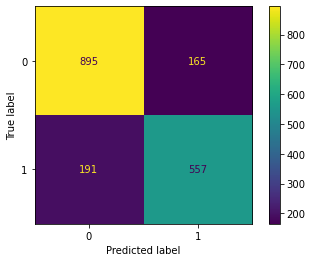

In [17]:
xgb2 = XGBClassifier()
xgb2.fit(x_train_scaled,y_train)
y_pred_xgb2 = xgb2.predict(x_test_scaled)
print(classification_report(y_train, xgb2.predict(x_train_scaled)))
print(classification_report(y_test, y_pred_xgb2))
plot_confusion_matrix(xgb2, x_test_scaled, y_test)
xgb_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb2})
xgb_dataframe

### KNN

evaluation for training 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      4275
           1       0.84      0.77      0.80      4275

    accuracy                           0.81      8550
   macro avg       0.81      0.81      0.81      8550
weighted avg       0.81      0.81      0.81      8550

evaluation for testing 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      1060
           1       0.61      0.53      0.57       748

    accuracy                           0.66      1808
   macro avg       0.65      0.64      0.65      1808
weighted avg       0.66      0.66      0.66      1808



c:\Users\Yousef\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Actual,Predicted
1922,0,0
1318,1,1
4787,0,0
2115,0,0
5689,0,0
...,...,...
6068,1,1
3245,1,0
5327,1,1
1111,0,1


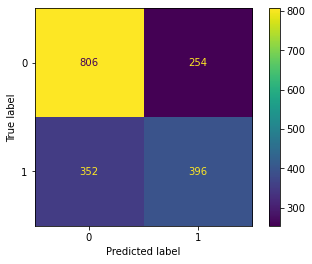

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,knn.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_knn))
plot_confusion_matrix(knn, x_test_scaled, y_test)
knn_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
knn_dataframe